In [3]:
import torch 
from torch import nn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd 

In [4]:
df=pd.read_csv("salary.csv")
df.head()

,YearsExperience,Salary
0,3.745401,56653.043661
1,9.507143,95054.964696
2,7.319939,81698.379809
3,5.986585,61968.249321
4,1.560186,39822.945392


In [5]:
X=df[["YearsExperience"]].values.astype(float)
Y=df[["Salary"]].values.astype(float)
X,Y

(array([[3.74540119],
        [9.50714306],
        [7.31993942],
        [5.98658484],
        [1.5601864 ],
        [1.5599452 ],
        [0.58083612],
        [8.66176146],
        [6.01115012],
        [7.08072578],
        [0.20584494],
        [9.69909852],
        [8.32442641],
        [2.12339111],
        [1.81824967],
        [1.8340451 ],
        [3.04242243],
        [5.24756432],
        [4.31945019],
        [2.9122914 ],
        [6.11852895],
        [1.39493861],
        [2.92144649],
        [3.66361843],
        [4.56069984],
        [7.85175961],
        [1.99673782],
        [5.14234438],
        [5.92414569],
        [0.46450413],
        [6.07544852],
        [1.70524124],
        [0.65051593],
        [9.48885537],
        [9.65632033],
        [8.08397348],
        [3.04613769],
        [0.97672114],
        [6.84233027],
        [4.40152494],
        [1.22038235],
        [4.9517691 ],
        [0.34388521],
        [9.09320402],
        [2.58779982],
        [6

In [6]:
scalar_x=StandardScaler()
scalar_y=StandardScaler()
X_sclaed=scalar_x.fit_transform(X)
Y_sclaed=scalar_y.fit_transform(Y)

In [7]:
X_train,X_test,Y_train,Y_test=train_test_split(X_sclaed,Y_sclaed,test_size=.2,random_state=40)

In [8]:
X_train_tensor=torch.from_numpy(X_train).float()
Y_train_tensor=torch.from_numpy(Y_train).float()
X_test_tensor=torch.from_numpy(X_test).float()
Y_test_tensor=torch.from_numpy(Y_test).float()

In [9]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        # for more inputs than one map to one output nn.linear(4,1)
        # here we have one input and one output
        self.lin=nn.Linear(1,1)
    def forward(self,x):
        return self.lin(x)

            

In [10]:
model=LinearRegressionModel()
loss_fn=nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=0.01)


In [11]:
epochs=260
for epoch in range (epochs):
    model.train()

    y_pred=model(X_train_tensor)

    loss=loss_fn(y_pred,Y_train_tensor)

    optimizer.zero_grad()

    loss.backward()
    optimizer.step()
    if (epoch+1) % 20 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

Epoch 20/260, Loss: 1.1950
Epoch 40/260, Loss: 0.5266
Epoch 60/260, Loss: 0.2487
Epoch 80/260, Loss: 0.1331
Epoch 100/260, Loss: 0.0850
Epoch 120/260, Loss: 0.0650
Epoch 140/260, Loss: 0.0567
Epoch 160/260, Loss: 0.0532
Epoch 180/260, Loss: 0.0518
Epoch 200/260, Loss: 0.0512
Epoch 220/260, Loss: 0.0509
Epoch 240/260, Loss: 0.0508
Epoch 260/260, Loss: 0.0508


In [12]:
model.eval()
with torch.inference_mode():
    y_test_pred=model(X_test_tensor)
    test_loss=loss_fn(y_test_pred,Y_test_tensor)
    print(f"Test Loss: {test_loss.item():.4f}") 

Test Loss: 0.0380


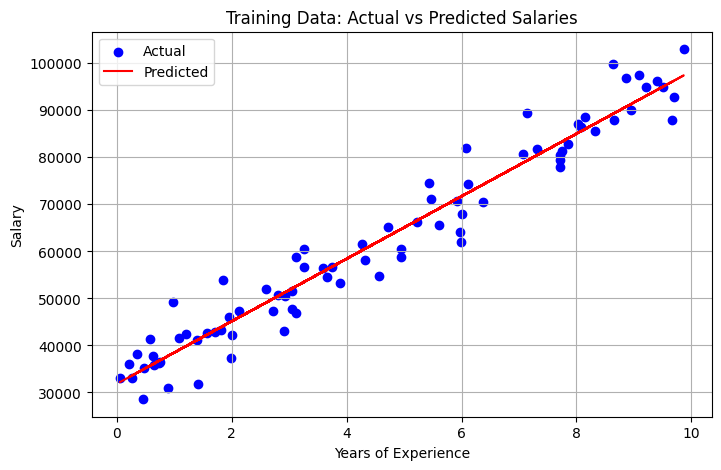

In [13]:
import matplotlib.pyplot as plt

# Get predictions on training data
model.eval()
with torch.no_grad():
    y_train_pred = model(X_train_tensor).numpy()

# Convert predictions and true values back to original scale
y_train_pred_original = scalar_y.inverse_transform(y_train_pred)
y_train_actual_original = scalar_y.inverse_transform(Y_train)

# Plot
plt.figure(figsize=(8,5))
plt.scatter(scalar_x.inverse_transform(X_train), y_train_actual_original, color='blue', label='Actual')
plt.plot(scalar_x.inverse_transform(X_train), y_train_pred_original, color='red', label='Predicted')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Training Data: Actual vs Predicted Salaries")
plt.legend()
plt.grid(True)
plt.show()


In [14]:
from sklearn.metrics import r2_score

r2= r2_score(Y_test_tensor.numpy(), y_test_pred.numpy())
print(f"R-squared score: {r2:.4f}")
 

R-squared score: 0.9574
